In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings as fw
fw('ignore')

### Importing CSV Files

In [2]:
customers_df = pd.read_csv('Datasets/Customers.csv')
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
products_df = pd.read_csv('Datasets/Products.csv')
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
transactions_df = pd.read_csv('Datasets/Transactions.csv')
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


### Checking for Null and Duplicated Values of Customers Data

In [6]:
customers_df.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
customers_df.duplicated().sum()

0

In [8]:
customers_df.CustomerID.nunique()

200

- SignupDate should be of DateTimeFormat

In [9]:
customers_df.SignupDate.unique()

array(['2022-07-10', '2022-02-13', '2024-03-07', '2022-10-09',
       '2022-08-15', '2024-01-07', '2022-06-18', '2024-01-13',
       '2023-08-14', '2022-12-15', '2022-12-12', '2024-08-07',
       '2024-05-19', '2024-06-22', '2023-11-20', '2024-01-03',
       '2023-12-05', '2024-09-21', '2023-01-12', '2024-06-11',
       '2023-04-17', '2023-10-27', '2022-03-04', '2024-02-05',
       '2022-07-04', '2024-05-03', '2022-11-09', '2024-06-29',
       '2022-04-16', '2024-01-30', '2024-04-11', '2024-04-17',
       '2024-08-04', '2023-09-27', '2024-10-01', '2024-07-06',
       '2023-02-04', '2024-10-13', '2022-03-07', '2023-12-27',
       '2023-03-15', '2023-02-05', '2024-07-10', '2022-02-25',
       '2024-10-23', '2024-03-22', '2024-11-07', '2024-09-18',
       '2024-03-02', '2023-12-21', '2024-02-20', '2024-09-29',
       '2024-11-11', '2024-04-12', '2024-07-27', '2024-01-28',
       '2024-04-07', '2022-04-22', '2023-03-06', '2022-12-14',
       '2023-10-22', '2024-11-15', '2023-07-06', '2023-

In [10]:
customers_df.SignupDate = pd.to_datetime(customers_df.SignupDate)

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [12]:
customers_df.CustomerName.nunique()

200

In [13]:
customers_df.Region.nunique() 

4

### Checking for Null and Duplicated Values of Products Data

In [14]:
products_df.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
products_df.duplicated().sum()

0

In [16]:
products_df.shape

(100, 4)

In [17]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [19]:
products_df.ProductID.nunique()

100

In [20]:
products_df.ProductName.nunique()

66

### Checking for Null and Duplicated Values of Transactions Data

In [21]:
transactions_df.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [22]:
transactions_df.duplicated().sum()

0

In [23]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [24]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [25]:
transactions_df.TransactionDate

0      2024-08-25 12:38:23
1      2024-05-27 22:23:54
2      2024-04-25 07:38:55
3      2024-03-26 22:55:37
4      2024-03-21 15:10:10
              ...         
995    2024-10-24 08:30:27
996    2024-06-04 02:15:24
997    2024-04-05 13:05:32
998    2024-09-29 10:16:02
999    2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: object

In [26]:
transactions_df.TransactionDate = pd.to_datetime(transactions_df.TransactionDate)

In [27]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


### Visualization

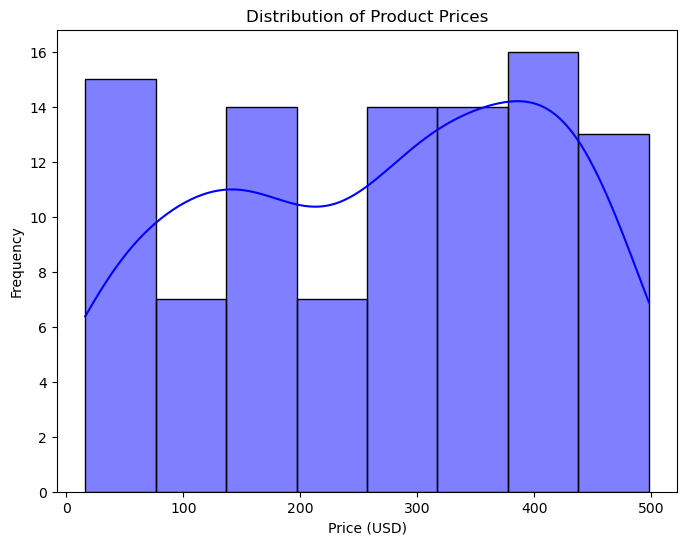

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(products_df.Price, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

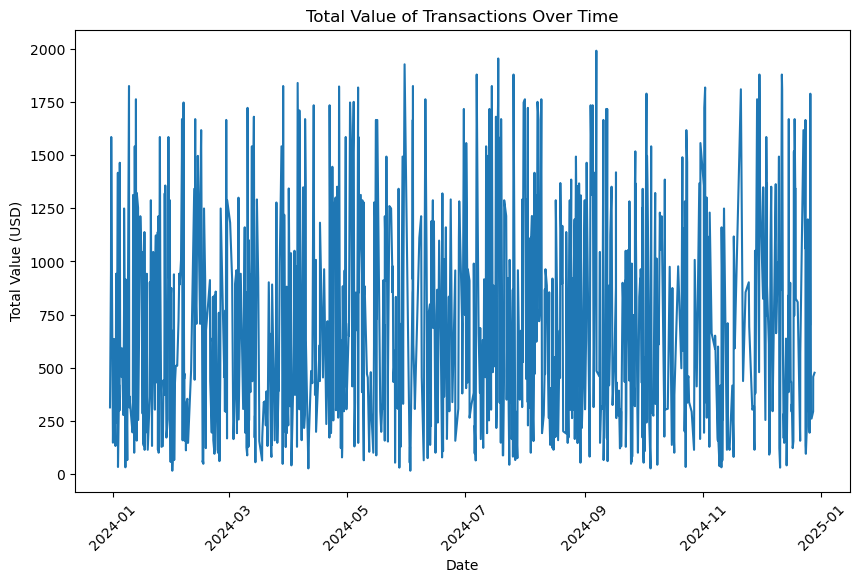

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=transactions_df.TransactionDate, y=transactions_df.TotalValue, ci=None)
plt.title('Total Value of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.show()

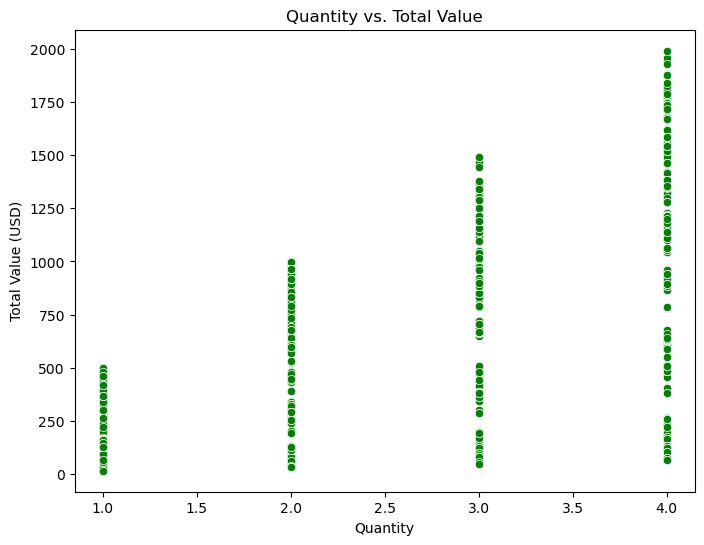

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = transactions_df, x='Quantity', y='TotalValue', color='green')
plt.title('Quantity vs. Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.show()

In [31]:
transactions_df[transactions_df.TransactionDate<'02/01/2024']

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
10,T00727,C0051,P067,2024-01-20 04:52:14,3,902.04,300.68
22,T00003,C0028,P057,2024-01-25 14:28:34,4,958.80,239.70
29,T00218,C0148,P057,2024-01-17 19:40:55,3,719.10,239.70
32,T00605,C0017,P057,2023-12-31 03:27:43,4,958.80,239.70
45,T00563,C0064,P049,2024-01-16 18:52:43,1,147.95,147.95
...,...,...,...,...,...,...,...
965,T00290,C0162,P026,2024-01-29 11:31:41,4,257.52,64.38
979,T00318,C0098,P046,2024-01-09 16:35:54,1,366.07,366.07
980,T00380,C0135,P046,2024-01-04 16:40:50,4,1464.28,366.07
986,T00943,C0133,P046,2024-01-01 10:21:22,1,366.07,366.07


In [32]:
transactions_df['TransactionDate'].dt.to_period('M')

0      2024-08
1      2024-05
2      2024-04
3      2024-03
4      2024-03
        ...   
995    2024-10
996    2024-06
997    2024-04
998    2024-09
999    2024-04
Name: TransactionDate, Length: 1000, dtype: period[M]

In [33]:
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transaction = transactions_df.groupby('Month').agg({'TotalValue': 'sum'}).reset_index()

In [34]:
monthly_transaction

,Month,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75


In [35]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('Month').agg({'TotalValue': 'sum'}).reset_index()
monthly_transactions['Month'] = monthly_transactions['Month'].dt.to_timestamp()

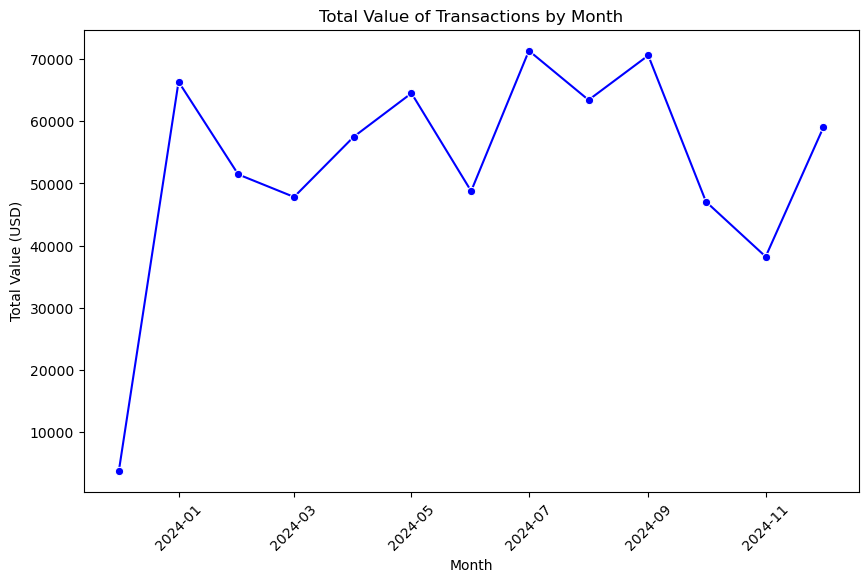

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_transactions, x='Month', y='TotalValue', marker='o', color='blue')
plt.title('Total Value of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.show()

In [37]:
customer_transactions_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
customer_transactions_df = pd.merge(customer_transactions_df, products_df, on='ProductID', how='left')
customer_transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [38]:
# Merge the Products data with the transactions data to get the Price column
customer_transactions_df = pd.merge(customer_transactions_df, products_df[['ProductID', 'Price']], on='ProductID', how='left')

# Now perform the aggregation
customer_spend = customer_transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean',  # Average price of products bought
    'Category': lambda x: x.mode()[0]  # Most frequent product category
}).reset_index()

# Merge 'SignupDate' from Customers.csv into the customer_spend DataFrame
customer_spend = pd.merge(customer_spend, customers_df[['CustomerID', 'SignupDate']], on='CustomerID', how='left')

# Calculate 'CustomerAge' based on 'SignupDate'
customer_spend['SignupDate'] = pd.to_datetime(customer_spend['SignupDate'])
customer_spend['CustomerAge'] = (pd.to_datetime('today') - customer_spend['SignupDate']).dt.days / 365

# Display the updated dataframe to verify
customer_spend.head()


,CustomerID,TotalValue,TransactionID,Price,Category,SignupDate,CustomerAge
0,C0001,3354.52,5,278.334000,Electronics,2022-07-10,2.553425
1,C0002,1862.74,4,208.920000,Clothing,2022-02-13,2.956164
2,C0003,2725.38,4,195.707500,Home Decor,2024-03-07,0.893151
3,C0004,5354.88,8,240.636250,Books,2022-10-09,2.304110
4,C0005,2034.24,3,291.603333,Electronics,2022-08-15,2.454795


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection for customer profiles
features = ['TotalValue', 'TransactionID', 'Price', 'CustomerAge']
customer_profile = customer_spend[features]

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(customer_profile)

# Create a DataFrame to store the similarity scores
similarity_df = pd.DataFrame(similarity_matrix, columns=customer_spend['CustomerID'], index=customer_spend['CustomerID'])

# Now, for the first 20 customers, find the top 3 lookalikes
lookalike_recommendations = {}

for cust_id in customer_spend['CustomerID'].iloc[:20]:  # CustomerIDs C0001 to C0020
    # Get the similarity scores for the current customer (excluding the customer itself)
    similar_customers = similarity_df[cust_id].drop(cust_id)
    
    # Sort by similarity score in descending order
    top_3_similar = similar_customers.sort_values(ascending=False).head(3)
    
    # Store the recommendations separately for lookalike and score
    lookalike_recommendations[cust_id] = {
        'Lookalike1': top_3_similar.index[0],
        'Score1': top_3_similar.values[0],
        'Lookalike2': top_3_similar.index[1],
        'Score2': top_3_similar.values[1],
        'Lookalike3': top_3_similar.index[2],
        'Score3': top_3_similar.values[2]
    }

# Convert the lookalike recommendations into a DataFrame
lookalike_df = pd.DataFrame.from_dict(lookalike_recommendations, orient='index')

# Save the recommendations to a CSV file
lookalike_df.to_csv('Lookalike.csv')

# Display the first few recommendations
lookalike_df.head()

,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3
C0001,C0176,1.000000,C0189,1.000000,C0196,0.999999
C0002,C0129,0.999999,C0185,0.999998,C0019,0.999998
C0003,C0179,1.000000,C0064,0.999999,C0100,0.999999
C0004,C0143,1.000000,C0087,1.000000,C0045,1.000000
C0005,C0132,0.999995,C0089,0.999992,C0192,0.999986


In [40]:
# Initialize an empty list to hold the structured lookalike data
lookalike_data = []

# Iterate over each customer ID and their lookalike recommendations
for cust_id, recommendations in lookalike_recommendations.items():
    # Initialize a dictionary to store the customer data
    customer_data = {'CustomerID': cust_id}
    
    # Iterate over the range of 1 to 3 for the lookalikes
    for i in range(1, 4):
        lookalike = recommendations[f'Lookalike{i}']
        score = recommendations[f'Score{i}']
        
        # Add the lookalike and score to the customer_data dictionary
        customer_data[f'Lookalike{i}'] = lookalike
        customer_data[f'Score{i}'] = score
    
    # Append the structured data for this customer to the list
    lookalike_data.append(customer_data)

# Convert the list of lookalike data to a DataFrame
lookalike_df = pd.DataFrame(lookalike_data)

# Optionally, save the DataFrame to a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the DataFrame
lookalike_df


,CustomerID,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3
0,C0001,C0176,1.000000,C0189,1.000000,C0196,0.999999
1,C0002,C0129,0.999999,C0185,0.999998,C0019,0.999998
2,C0003,C0179,1.000000,C0064,0.999999,C0100,0.999999
3,C0004,C0143,1.000000,C0087,1.000000,C0045,1.000000
4,C0005,C0132,0.999995,C0089,0.999992,C0192,0.999986
5,C0006,C0011,1.000000,C0152,1.000000,C0181,0.999999
6,C0007,C0061,1.000000,C0085,0.999999,C0192,0.999997
7,C0008,C0162,0.999999,C0108,0.999999,C0105,0.999999
8,C0009,C0080,0.999997,C0020,0.999997,C0015,0.999722
9,C0010,C0047,0.999999,C0164,0.999999,C0070,0.999999


In [41]:
from sklearn.cluster import KMeans
import pandas as pd

# Example: Add 'lookalike score' and 'customer' data to a DataFrame
lookalike_df['LookalikeScore'] = lookalike_df[['Score1', 'Score2', 'Score3']].mean(axis=1)

# Use KMeans clustering to create customer segments
kmeans = KMeans(n_clusters=3, random_state=0)  # You can adjust the number of clusters
lookalike_df['Segment'] = kmeans.fit_predict(lookalike_df[['LookalikeScore']])

# Display the segmented data
lookalike_df.head()


,CustomerID,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3,LookalikeScore,Segment
0,C0001,C0176,1.000000,C0189,1.000000,C0196,0.999999,1.000000,0
1,C0002,C0129,0.999999,C0185,0.999998,C0019,0.999998,0.999998,0
2,C0003,C0179,1.000000,C0064,0.999999,C0100,0.999999,0.999999,0
3,C0004,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0
4,C0005,C0132,0.999995,C0089,0.999992,C0192,0.999986,0.999991,0


In [42]:
# Assume 'customer_transactions_df' contains transaction data
top_lookalikes = lookalike_df[['CustomerID', 'Lookalike1', 'Score1']]  # top lookalikes with score
top_lookalikes = top_lookalikes.sort_values(by='Score1', ascending=False)

# Find products bought by similar customers and suggest them
for cust_id, lookalike, score in top_lookalikes.values:
    # Find top products bought by 'lookalike'
    lookalike_products = customer_transactions_df[customer_transactions_df['CustomerID'] == lookalike]
    recommended_products = lookalike_products['ProductID'].unique()
    
    print(f"Customer {cust_id} should consider these products based on their lookalikes: {recommended_products}")


Customer C0020 should consider these products based on their lookalikes: ['P021']
Customer C0018 should consider these products based on their lookalikes: ['P036' 'P042' 'P017' 'P015' 'P064' 'P020' 'P056']
Customer C0013 should consider these products based on their lookalikes: ['P049' 'P061' 'P030' 'P027' 'P037']
Customer C0012 should consider these products based on their lookalikes: ['P060' 'P038' 'P086' 'P076' 'P036' 'P082' 'P012' 'P077']
Customer C0004 should consider these products based on their lookalikes: ['P054' 'P076' 'P014' 'P005' 'P094' 'P026']
Customer C0011 should consider these products based on their lookalikes: ['P051' 'P058' 'P072' 'P074' 'P079']
Customer C0006 should consider these products based on their lookalikes: ['P030' 'P017' 'P089' 'P055' 'P046']
Customer C0001 should consider these products based on their lookalikes: ['P087' 'P090' 'P071']
Customer C0017 should consider these products based on their lookalikes: ['P087' 'P053' 'P039' 'P081' 'P006' 'P024']
Cus

In [43]:
# Remove rows with NaN in Lookalike1
merged_df = pd.merge(customer_transactions_df, lookalike_df, how='left', left_on='CustomerID', right_on='CustomerID')

merged_df = merged_df.dropna(subset=['Lookalike1'])

# Recalculate engagement after handling missing values
original_customer_engagement = merged_df.groupby('CustomerID').size()

# Now, calculate lookalike engagement
lookalike_engagement = merged_df.groupby('Lookalike1')['ProductID'].count()

# To avoid division by zero, ensure there are no missing values in either engagement series
engagement_similarity = original_customer_engagement / lookalike_engagement

# Display engagement similarity
print(engagement_similarity.head())


C0001   NaN
C0002   NaN
C0003   NaN
C0004   NaN
C0005   NaN
dtype: float64


In [44]:
# Fill NaN with zero or another default value
engagement_similarity = engagement_similarity.fillna(0)

# Display the results
engagement_similarity.head()


C0001    0.0
C0002    0.0
C0003    0.0
C0004    0.0
C0005    0.0
dtype: float64

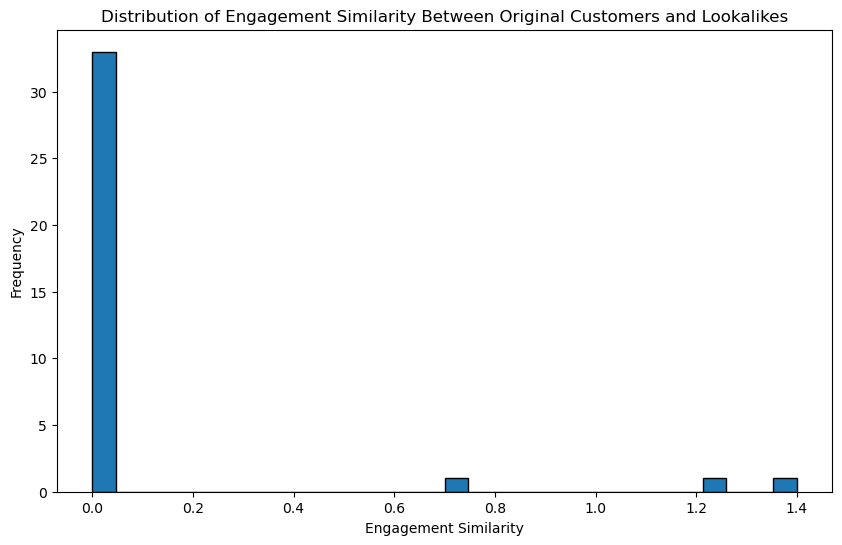

In [45]:
import matplotlib.pyplot as plt

# Plot the distribution of engagement similarity
plt.figure(figsize=(10, 6))
plt.hist(engagement_similarity, bins=30, edgecolor='black')
plt.title('Distribution of Engagement Similarity Between Original Customers and Lookalikes')
plt.xlabel('Engagement Similarity')
plt.ylabel('Frequency')
plt.show()


In [46]:
# Check the number of transactions per customer
customer_transaction_counts = customer_transactions_df.groupby('CustomerID').size()
print(customer_transaction_counts)

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Length: 199, dtype: int64


In [50]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,CustomerName,Region,...,Price_y,Price,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3,LookalikeScore,Segment
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,2024-09,David Li,North America,...,300.68,300.68,C0162,0.999999,C0108,0.999999,C0105,0.999999,0.999999,0.0
32,T00605,C0017,P057,2023-12-31 03:27:43,4,958.80,239.70,2023-12,Jennifer King,Europe,...,239.70,239.70,C0053,1.000000,C0099,1.000000,C0102,1.000000,1.000000,0.0
37,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,2024-07,Kathleen Rodriguez,South America,...,147.95,147.95,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0.0
39,T00136,C0010,P049,2024-02-22 18:44:05,2,295.90,147.95,2024-02,Aaron Cox,Europe,...,147.95,147.95,C0047,0.999999,C0164,0.999999,C0070,0.999999,0.999999,0.0
44,T00551,C0018,P049,2024-02-23 13:28:08,3,443.85,147.95,2024-02,Tyler Haynes,North America,...,147.95,147.95,C0013,1.000000,C0105,1.000000,C0108,1.000000,1.000000,0.0


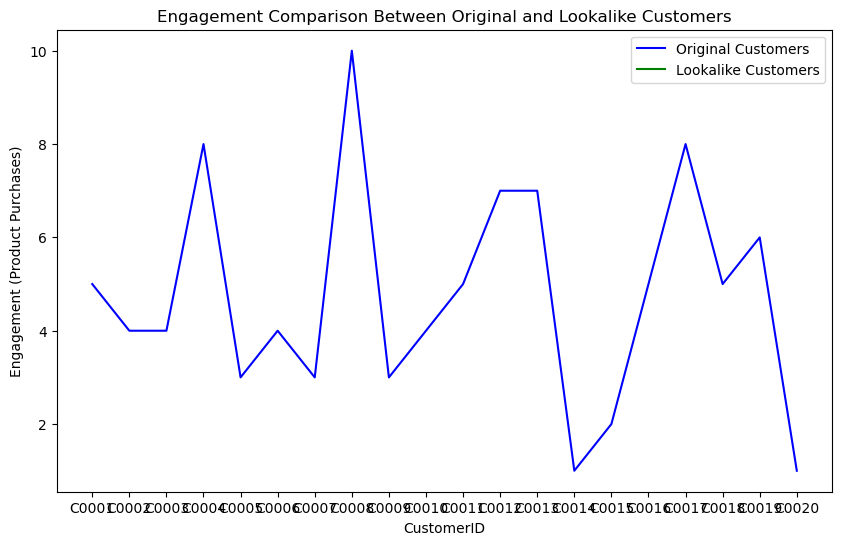

In [51]:
# Example: Calculate engagement by counting product purchases (adjust according to available data)
original_engagement = merged_df.groupby('CustomerID')['ProductID'].count()
lookalike_engagement = merged_df.groupby('Lookalike1')['ProductID'].count()

# Create a DataFrame for comparison
engagement_comparison = pd.DataFrame({
    'CustomerID': original_engagement.index,
    'Original_Engagement': original_engagement.values,
    'Lookalike_Engagement': lookalike_engagement.reindex(original_engagement.index).values
})

# Plot the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(engagement_comparison['CustomerID'], engagement_comparison['Original_Engagement'], label='Original Customers', color='b')
plt.plot(engagement_comparison['CustomerID'], engagement_comparison['Lookalike_Engagement'], label='Lookalike Customers', color='g')
plt.xlabel('CustomerID')
plt.ylabel('Engagement (Product Purchases)')
plt.title('Engagement Comparison Between Original and Lookalike Customers')
plt.legend()
plt.show()


In [52]:
# Reindex lookalike engagement to match the original engagement index
lookalike_engagement_aligned = lookalike_engagement.reindex(original_engagement.index).fillna(0)

# Now calculate cosine similarity between the two aligned engagement data
original_engagement_values = original_engagement.values.reshape(1, -1)
lookalike_engagement_values = lookalike_engagement_aligned.values.reshape(1, -1)

# Calculate similarity score
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(original_engagement_values, lookalike_engagement_values)
print("Cosine similarity score: ", similarity_score[0][0])


Cosine similarity score:  0.4012502821292039


In [55]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,CustomerName,Region,...,Price_y,Price,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3,LookalikeScore,Segment
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,2024-09,David Li,North America,...,300.68,300.68,C0162,0.999999,C0108,0.999999,C0105,0.999999,0.999999,0.0
32,T00605,C0017,P057,2023-12-31 03:27:43,4,958.80,239.70,2023-12,Jennifer King,Europe,...,239.70,239.70,C0053,1.000000,C0099,1.000000,C0102,1.000000,1.000000,0.0
37,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,2024-07,Kathleen Rodriguez,South America,...,147.95,147.95,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0.0
39,T00136,C0010,P049,2024-02-22 18:44:05,2,295.90,147.95,2024-02,Aaron Cox,Europe,...,147.95,147.95,C0047,0.999999,C0164,0.999999,C0070,0.999999,0.999999,0.0
44,T00551,C0018,P049,2024-02-23 13:28:08,3,443.85,147.95,2024-02,Tyler Haynes,North America,...,147.95,147.95,C0013,1.000000,C0105,1.000000,C0108,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,T00675,C0002,P071,2024-12-03 01:41:41,2,254.72,127.36,2024-12,Elizabeth Lutz,Asia,...,127.36,127.36,C0129,0.999999,C0185,0.999998,C0019,0.999998,0.999998,0.0
967,T00557,C0008,P026,2024-03-11 03:22:29,2,128.76,64.38,2024-03,David Li,North America,...,64.38,64.38,C0162,0.999999,C0108,0.999999,C0105,0.999999,0.999999,0.0
984,T00769,C0011,P046,2024-02-06 14:46:43,4,1464.28,366.07,2024-02,Bryan Mathews,South America,...,366.07,366.07,C0152,1.000000,C0006,1.000000,C0181,1.000000,1.000000,0.0
987,T00379,C0004,P077,2024-12-23 14:13:52,4,1062.04,265.51,2024-12,Kathleen Rodriguez,South America,...,265.51,265.51,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0.0


In [56]:
# Step 1: Aggregate 'Price_x' and 'Price_y' into a new column 'Price_combined'
merged_df['Price_combined'] = merged_df['Price_x'] + merged_df['Price_y']

# Step 2: Set 'Price_combined' as the target variable (y)
y = merged_df['Price_combined']

# Step 3: Create the feature set (X) by dropping 'Price_x', 'Price_y', and 'Price_combined'
X = merged_df.drop(['Price_x', 'Price_y', 'Price_combined'], axis=1)

# Step 4: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (76, 21)
y_train shape: (76,)
X_test shape: (19, 21)
y_test shape: (19,)


In [57]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Month,CustomerName,Region,...,Price,Lookalike1,Score1,Lookalike2,Score2,Lookalike3,Score3,LookalikeScore,Segment,Price_combined
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,2024-09,David Li,North America,...,300.68,C0162,0.999999,C0108,0.999999,C0105,0.999999,0.999999,0.0,601.36
32,T00605,C0017,P057,2023-12-31 03:27:43,4,958.80,239.70,2023-12,Jennifer King,Europe,...,239.70,C0053,1.000000,C0099,1.000000,C0102,1.000000,1.000000,0.0,479.40
37,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,2024-07,Kathleen Rodriguez,South America,...,147.95,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0.0,295.90
39,T00136,C0010,P049,2024-02-22 18:44:05,2,295.90,147.95,2024-02,Aaron Cox,Europe,...,147.95,C0047,0.999999,C0164,0.999999,C0070,0.999999,0.999999,0.0,295.90
44,T00551,C0018,P049,2024-02-23 13:28:08,3,443.85,147.95,2024-02,Tyler Haynes,North America,...,147.95,C0013,1.000000,C0105,1.000000,C0108,1.000000,1.000000,0.0,295.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,T00675,C0002,P071,2024-12-03 01:41:41,2,254.72,127.36,2024-12,Elizabeth Lutz,Asia,...,127.36,C0129,0.999999,C0185,0.999998,C0019,0.999998,0.999998,0.0,254.72
967,T00557,C0008,P026,2024-03-11 03:22:29,2,128.76,64.38,2024-03,David Li,North America,...,64.38,C0162,0.999999,C0108,0.999999,C0105,0.999999,0.999999,0.0,128.76
984,T00769,C0011,P046,2024-02-06 14:46:43,4,1464.28,366.07,2024-02,Bryan Mathews,South America,...,366.07,C0152,1.000000,C0006,1.000000,C0181,1.000000,1.000000,0.0,732.14
987,T00379,C0004,P077,2024-12-23 14:13:52,4,1062.04,265.51,2024-12,Kathleen Rodriguez,South America,...,265.51,C0143,1.000000,C0087,1.000000,C0045,1.000000,1.000000,0.0,531.02


In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 7 to 997
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    95 non-null     object        
 1   CustomerID       95 non-null     object        
 2   ProductID        95 non-null     object        
 3   TransactionDate  95 non-null     datetime64[ns]
 4   Quantity         95 non-null     int64         
 5   TotalValue       95 non-null     float64       
 6   Price_x          95 non-null     float64       
 7   Month            95 non-null     period[M]     
 8   CustomerName     95 non-null     object        
 9   Region           95 non-null     object        
 10  SignupDate       95 non-null     datetime64[ns]
 11  ProductName      95 non-null     object        
 12  Category         95 non-null     object        
 13  Price_y          95 non-null     float64       
 14  Price            95 non-null     float64       


In [59]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'Month', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'Price',
       'Lookalike1', 'Score1', 'Lookalike2', 'Score2', 'Lookalike3', 'Score3',
       'LookalikeScore', 'Segment', 'Price_combined'],
      dtype='object')

In [61]:
merged_df.drop(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
                'Price_x', 'Month', 'CustomerName', 'Region',
                'SignupDate', 'ProductName', 'Category', 'Price_y', 'Price',
                'Lookalike1', 'Score1', 'Lookalike2', 'Score2', 'Lookalike3', 'Score3',
                'LookalikeScore', 'Segment' ],axis=1,inplace=True)

In [62]:
merged_df

,Quantity,TotalValue,Price_combined
7,1,300.68,601.36
32,4,958.80,479.40
37,4,591.80,295.90
39,2,295.90,295.90
44,3,443.85,295.90
...,...,...,...
953,2,254.72,254.72
967,2,128.76,128.76
984,4,1464.28,732.14
987,4,1062.04,531.02


In [64]:
from sklearn.ensemble import RandomForestRegressor

X = merged_df.drop('Price_combined',axis=1)
y = merged_df.Price_combined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame of feature names and their importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


      Feature  Importance
1  TotalValue      0.7798
0    Quantity      0.2202


In [66]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average score
print(f'Cross-validation Mean Squared Error: {-scores.mean()}')


Cross-validation Mean Squared Error: 4200.951052920844


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees in the forest
    'max_depth': [5, 10, 20],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize the Random Forest model
model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')


Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1],   # Shrinks the contribution of each tree
    'max_depth': [3, 5, 10],               # Maximum depth of the individual trees
}

# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate performance metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R² Score: {r2_train}")

print("\nTesting Performance:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R² Score: {r2_test}")


Training Performance:
MAE: 2.998841804173589
MSE: 14.423463348718826
RMSE: 3.79782350152279
R² Score: 0.9997873677605327

Testing Performance:
MAE: 23.053338350323443
MSE: 2307.4583185783567
RMSE: 48.036010643873794
R² Score: 0.9742843183739367


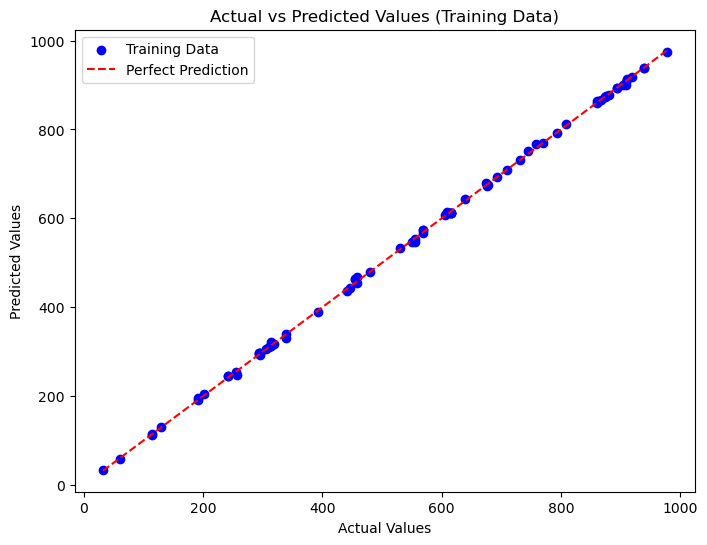

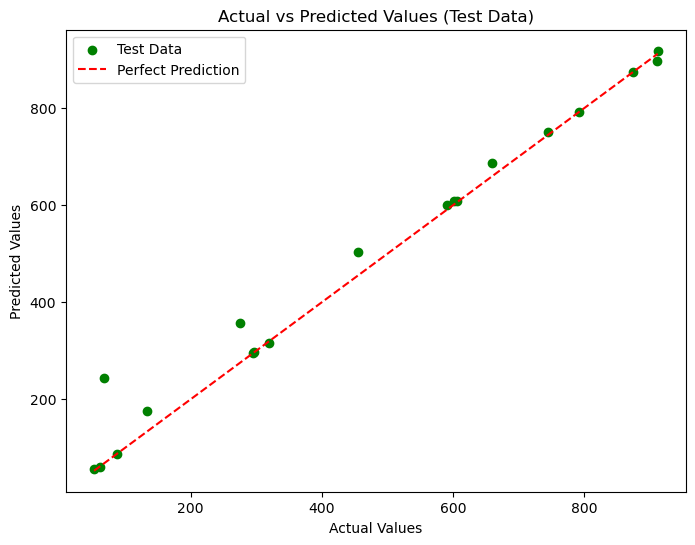

In [72]:
import matplotlib.pyplot as plt

# Plot for Training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Data)')
plt.legend()
plt.show()

# Plot for Test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Data)')
plt.legend()
plt.show()


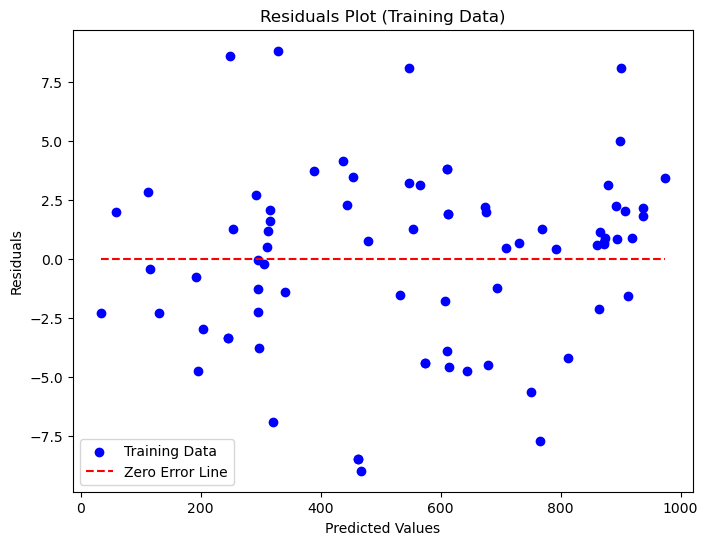

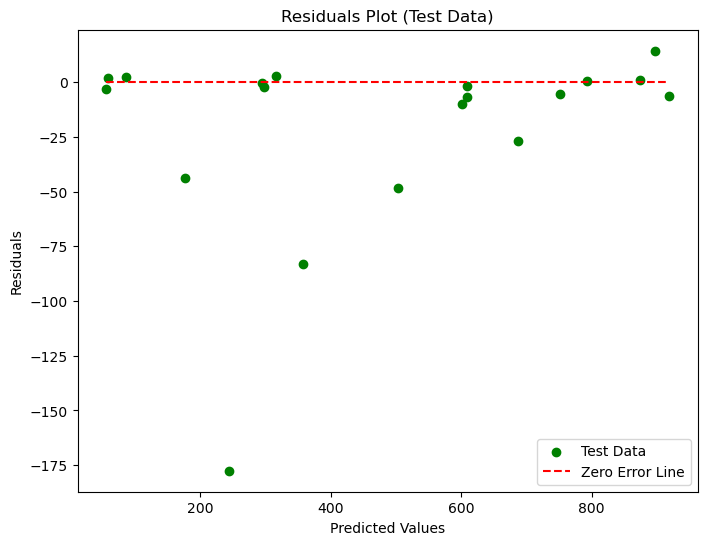

In [73]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Residuals plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Training Data')
plt.hlines(0, min(y_train_pred), max(y_train_pred), colors='red', linestyles='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Training Data)')
plt.legend()
plt.show()

# Residuals plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals_test, color='green', label='Test Data')
plt.hlines(0, min(y_test_pred), max(y_test_pred), colors='red', linestyles='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Test Data)')
plt.legend()
plt.show()


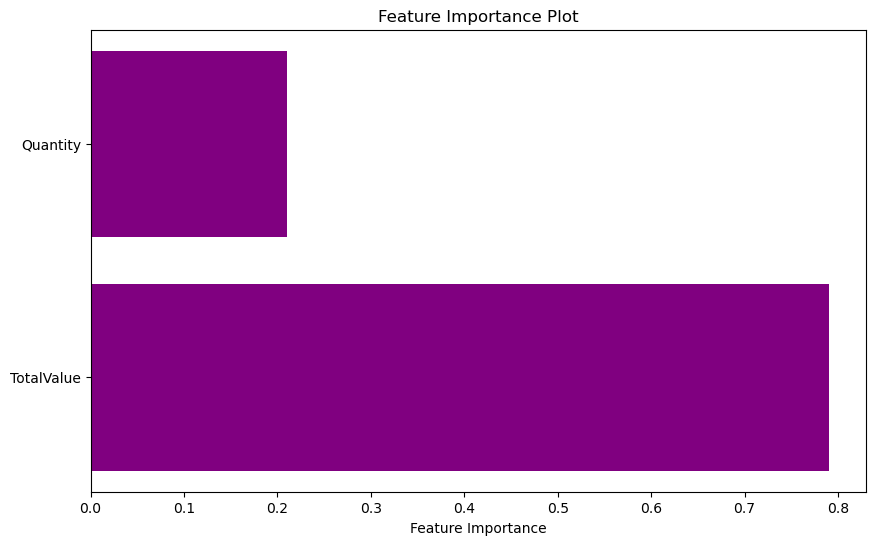

In [74]:
# Feature importance plot
feature_importance = grid_search.best_estimator_.feature_importances_
features = X.columns  # Assuming X is your DataFrame containing features

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
